In [1]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 40 kB/s 
     |████████████████████████████████| 198 kB 36.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=291cd7e6717d21d4df6343f26b5e102db095603b8ce28a22d9bd8fc090a58e62
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


#Importing Libraries

In [2]:

from pyspark.sql import SparkSession
import numpy as np
import pyspark.sql.functions as f
from pyspark.sql.window import Window
import sys
import pandas as pd
import matplotlib.pyplot as plt

#Initialising Spark session

In [3]:
spark = (SparkSession
           .builder
           .appName("MySpark")
           .getOrCreate())

In [ ]:
sc = spark.sparkContext

#Reading and Displaying the Data

In [ ]:
df = spark.read.csv("diabetic_data.csv", inferSchema=True, header=True,nullValue="?")

In [ ]:
df.show()

+------------+-----------+---------------+------+--------+------+-----------------+------------------------+-------------------+----------------+----------+--------------------+------------------+--------------+---------------+-----------------+----------------+----------------+------+------+------+----------------+-------------+---------+---------+-----------+-----------+--------------+-----------+-------------+---------+---------+-----------+------------+-------------+--------+--------+------------+----------+-------+-----------+-------+-------------------+-------------------+------------------------+-----------------------+----------------------+------+-----------+----------+
|encounter_id|patient_nbr|           race|gender|     age|weight|admission_type_id|discharge_disposition_id|admission_source_id|time_in_hospital|payer_code|   medical_specialty|num_lab_procedures|num_procedures|num_medications|number_outpatient|number_emergency|number_inpatient|diag_1|diag_2|diag_3|number_diagn

#Counting Total Number of patients and datatypes of each column

In [ ]:
total_rows = df.count()
print("There are ",total_rows," rows in our data.")

There are  101766  rows in our data.


In [ ]:
df.dtypes

[('encounter_id', 'int'),
 ('patient_nbr', 'int'),
 ('race', 'string'),
 ('gender', 'string'),
 ('age', 'string'),
 ('weight', 'string'),
 ('admission_type_id', 'int'),
 ('discharge_disposition_id', 'int'),
 ('admission_source_id', 'int'),
 ('time_in_hospital', 'int'),
 ('payer_code', 'string'),
 ('medical_specialty', 'string'),
 ('num_lab_procedures', 'int'),
 ('num_procedures', 'int'),
 ('num_medications', 'int'),
 ('number_outpatient', 'int'),
 ('number_emergency', 'int'),
 ('number_inpatient', 'int'),
 ('diag_1', 'string'),
 ('diag_2', 'string'),
 ('diag_3', 'string'),
 ('number_diagnoses', 'int'),
 ('max_glu_serum', 'string'),
 ('A1Cresult', 'string'),
 ('metformin', 'string'),
 ('repaglinide', 'string'),
 ('nateglinide', 'string'),
 ('chlorpropamide', 'string'),
 ('glimepiride', 'string'),
 ('acetohexamide', 'string'),
 ('glipizide', 'string'),
 ('glyburide', 'string'),
 ('tolbutamide', 'string'),
 ('pioglitazone', 'string'),
 ('rosiglitazone', 'string'),
 ('acarbose', 'string'),

#Checking whether data is unique on some key

In [ ]:
patients = df[["patient_nbr"]].groupBy(["patient_nbr"]).count()

In [ ]:
patients.columns

['patient_nbr', 'count']

In [ ]:
patients[patients["count"]>1].orderBy(["count"], ascending = False).show(150)

+-----------+-----+
|patient_nbr|count|
+-----------+-----+
|   88785891|   40|
|   43140906|   28|
|   88227540|   23|
|   23199021|   23|
|    1660293|   23|
|   23643405|   22|
|   84428613|   22|
|   92709351|   21|
|   88789707|   20|
|   29903877|   20|
|   23398488|   20|
|   37096866|   20|
|   90609804|   20|
|   89472402|   20|
|   88479036|   19|
|   88681950|   19|
|   97391007|   19|
|   24011577|   18|
|    3401055|   18|
|   91160280|   18|
|   84348792|   18|
|   91751121|   18|
|    3481272|   18|
|  106757478|   17|
|   90489195|   17|
|   41699412|   17|
|     384939|   16|
|   90164655|   16|
|   41617368|   16|
|   84676248|   16|
|   16156494|   15|
|   34248474|   15|
|   84397842|   15|
|    2486844|   15|
|   85232619|   15|
|  110463471|   15|
|   86931513|   15|
|   41717169|   15|
|     362610|   15|
|   91776843|   14|
|   62352252|   14|
|   88410879|   14|
|   40595031|   14|
|  103832127|   14|
|    5207247|   13|
|   41744394|   13|
|   25151994|   13|


In [ ]:
df[["encounter_id","patient_nbr"]].distinct().count()#.groupBy(["encounter_id","patient_nbr"]).count()

101766

#Basic statistics of the data

In [ ]:
info = df.describe()

In [ ]:
info.show()

+-------+--------------------+--------------------+---------------+---------------+--------+--------+-----------------+------------------------+-------------------+------------------+----------+--------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+-----------------+-------------+---------+---------+-----------+-----------+--------------+-----------+-------------+---------+---------+-----------+------------+-------------+--------+--------+------------+----------+-------+-----------+-------+-------------------+-------------------+------------------------+-----------------------+----------------------+------+-----------+----------+
|summary|        encounter_id|         patient_nbr|           race|         gender|     age|  weight|admission_type_id|discharge_disposition_id|admission_source_id|  time_in_hospital|payer_code|   medical_specialty|num_lab_

In [ ]:
info.columns[3:]

['race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

#Removing Columns with high missing values

In [ ]:
row = info[info.columns[3:]].collect()[0].asDict()

In [ ]:
row.items()

dict_items([('race', '99493'), ('gender', '101766'), ('age', '101766'), ('weight', '3197'), ('admission_type_id', '101766'), ('discharge_disposition_id', '101766'), ('admission_source_id', '101766'), ('time_in_hospital', '101766'), ('payer_code', '61510'), ('medical_specialty', '51817'), ('num_lab_procedures', '101766'), ('num_procedures', '101766'), ('num_medications', '101766'), ('number_outpatient', '101766'), ('number_emergency', '101766'), ('number_inpatient', '101766'), ('diag_1', '101745'), ('diag_2', '101408'), ('diag_3', '100343'), ('number_diagnoses', '101766'), ('max_glu_serum', '101766'), ('A1Cresult', '101766'), ('metformin', '101766'), ('repaglinide', '101766'), ('nateglinide', '101766'), ('chlorpropamide', '101766'), ('glimepiride', '101766'), ('acetohexamide', '101766'), ('glipizide', '101766'), ('glyburide', '101766'), ('tolbutamide', '101766'), ('pioglitazone', '101766'), ('rosiglitazone', '101766'), ('acarbose', '101766'), ('miglitol', '101766'), ('troglitazone', '10

In [ ]:
counts = sc.parallelize(list(row.items()))

In [ ]:
counts.collect()

[('race', '99493'),
 ('gender', '101766'),
 ('age', '101766'),
 ('weight', '3197'),
 ('admission_type_id', '101766'),
 ('discharge_disposition_id', '101766'),
 ('admission_source_id', '101766'),
 ('time_in_hospital', '101766'),
 ('payer_code', '61510'),
 ('medical_specialty', '51817'),
 ('num_lab_procedures', '101766'),
 ('num_procedures', '101766'),
 ('num_medications', '101766'),
 ('number_outpatient', '101766'),
 ('number_emergency', '101766'),
 ('number_inpatient', '101766'),
 ('diag_1', '101745'),
 ('diag_2', '101408'),
 ('diag_3', '100343'),
 ('number_diagnoses', '101766'),
 ('max_glu_serum', '101766'),
 ('A1Cresult', '101766'),
 ('metformin', '101766'),
 ('repaglinide', '101766'),
 ('nateglinide', '101766'),
 ('chlorpropamide', '101766'),
 ('glimepiride', '101766'),
 ('acetohexamide', '101766'),
 ('glipizide', '101766'),
 ('glyburide', '101766'),
 ('tolbutamide', '101766'),
 ('pioglitazone', '101766'),
 ('rosiglitazone', '101766'),
 ('acarbose', '101766'),
 ('miglitol', '101766'

In [ ]:
thresh = 0.9

In [ ]:
valid_count_cols = counts.filter(lambda x: (float(x[1])/total_rows)>thresh)

In [ ]:
valid_cols = valid_count_cols.map(lambda x: x[0]).collect()

In [ ]:
df_valid_cols = df[valid_cols]

In [ ]:
df_valid_cols.show()

+---------------+------+--------+-----------------+------------------------+-------------------+----------------+------------------+--------------+---------------+-----------------+----------------+----------------+------+------+------+----------------+-------------+---------+---------+-----------+-----------+--------------+-----------+-------------+---------+---------+-----------+------------+-------------+--------+--------+------------+----------+-------+-----------+-------+-------------------+-------------------+------------------------+-----------------------+----------------------+------+-----------+----------+
|           race|gender|     age|admission_type_id|discharge_disposition_id|admission_source_id|time_in_hospital|num_lab_procedures|num_procedures|num_medications|number_outpatient|number_emergency|number_inpatient|diag_1|diag_2|diag_3|number_diagnoses|max_glu_serum|A1Cresult|metformin|repaglinide|nateglinide|chlorpropamide|glimepiride|acetohexamide|glipizide|glyburide|tolb

In [ ]:
#df_valid_cols.dtypes

In [ ]:
num_variables = [column[0]  for column in df_valid_cols.dtypes if column[1] == 'int']
num_variables = num_variables[3:]
num_variables

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [ ]:
cat_variables = [column[0]  for column in df_valid_cols.dtypes if column[0] not in num_variables]
cat_variables

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

#Checking count of Missing Values in categorical variables

In [ ]:
df_valid_cols.select([f.count(f.when(f.col(c).isNull(),c)).alias(c) for c in cat_variables]).show()

+----+------+---+-----------------+------------------------+-------------------+------+------+------+-------------+---------+---------+-----------+-----------+--------------+-----------+-------------+---------+---------+-----------+------------+-------------+--------+--------+------------+----------+-------+-----------+-------+-------------------+-------------------+------------------------+-----------------------+----------------------+------+-----------+----------+
|race|gender|age|admission_type_id|discharge_disposition_id|admission_source_id|diag_1|diag_2|diag_3|max_glu_serum|A1Cresult|metformin|repaglinide|nateglinide|chlorpropamide|glimepiride|acetohexamide|glipizide|glyburide|tolbutamide|pioglitazone|rosiglitazone|acarbose|miglitol|troglitazone|tolazamide|examide|citoglipton|insulin|glyburide-metformin|glipizide-metformin|glimepiride-pioglitazone|metformin-rosiglitazone|metformin-pioglitazone|change|diabetesMed|readmitted|
+----+------+---+-----------------+---------------------

#Replacing the missing values

In [ ]:
total_rows = df_valid_cols.count()
for variable in cat_variables:
    null_count = df_valid_cols.select([f.count(f.when(f.col(variable).isNull(),variable)).alias(variable) ])
    null_count = null_count.collect()[0][variable]
    if null_count == 0 :
        continue
    if null_count > total_rows/100:
        df_valid_cols = df_valid_cols.withColumn(variable,f.when(f.col(variable).isNull(),"OTHERS").otherwise(f.col(variable)))
    else:
        col_cnt = df_valid_cols.groupby(variable).count().orderBy("count", ascending = False)
        mode = col_cnt.collect()[0][variable]
        df_valid_cols = df_valid_cols.withColumn(variable,f.when(f.col(variable).isNull(),mode).otherwise(f.col(variable)))

In [ ]:
df_valid_cols.select([f.count(f.when(f.col(c).isNull(),c)).alias(c) for c in cat_variables]).show()

+----+------+---+-----------------+------------------------+-------------------+------+------+------+-------------+---------+---------+-----------+-----------+--------------+-----------+-------------+---------+---------+-----------+------------+-------------+--------+--------+------------+----------+-------+-----------+-------+-------------------+-------------------+------------------------+-----------------------+----------------------+------+-----------+----------+
|race|gender|age|admission_type_id|discharge_disposition_id|admission_source_id|diag_1|diag_2|diag_3|max_glu_serum|A1Cresult|metformin|repaglinide|nateglinide|chlorpropamide|glimepiride|acetohexamide|glipizide|glyburide|tolbutamide|pioglitazone|rosiglitazone|acarbose|miglitol|troglitazone|tolazamide|examide|citoglipton|insulin|glyburide-metformin|glipizide-metformin|glimepiride-pioglitazone|metformin-rosiglitazone|metformin-pioglitazone|change|diabetesMed|readmitted|
+----+------+---+-----------------+---------------------

#Selecting categorical variables which do not have low variance 

In [ ]:
cat_variables_valid = []
for variable in cat_variables:
    col_cnt = df_valid_cols.groupby(variable).count().orderBy("count", ascending = False)
    col_cnt_per = col_cnt.withColumn('cnt_per', f.col('count')/f.sum(col_cnt["count"]).over(Window.partitionBy())*100)
    #col_cnt_per.show()
    col_cnt_per_cumulative = col_cnt_per.withColumn('cnt_per_cumulative', f.sum(col_cnt_per["cnt_per"]).over(Window.partitionBy().orderBy().rowsBetween(-sys.maxsize, 0)))
    col_cnt_per_cumulative.show()
    value = list(col_cnt_per_cumulative.select("cnt_per_cumulative").collect()[0].asDict().values())[0]
    if value <= 99.0:
        cat_variables_valid.append(variable)

+---------------+-----+------------------+------------------+
|           race|count|           cnt_per|cnt_per_cumulative|
+---------------+-----+------------------+------------------+
|      Caucasian|76099| 74.77841322249081| 74.77841322249081|
|AfricanAmerican|19210|18.876638562977814| 93.65505178546863|
|         OTHERS| 2273|2.2335554114340743|  95.8886071969027|
|       Hispanic| 2037| 2.001650846058605|  97.8902580429613|
|          Other| 1506|1.4798655739637991|  99.3701236169251|
|          Asian|  641|0.6298763830748972|             100.0|
+---------------+-----+------------------+------------------+

+---------------+-----+--------------------+------------------+
|         gender|count|             cnt_per|cnt_per_cumulative|
+---------------+-----+--------------------+------------------+
|         Female|54708|   53.75862272271682| 53.75862272271682|
|           Male|47055|   46.23842933789281| 99.99705206060963|
|Unknown/Invalid|    3|0.002947939390366134|             10

In [ ]:
print(cat_variables_valid)
print(len(cat_variables_valid))

['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted']
22


#Checking count of Missing Values in Numeric variables

In [ ]:
df_valid_cols.select([f.count(f.when(f.col(c).isNull(),c)).alias(c) for c in num_variables]).show()

+----------------+------------------+--------------+---------------+-----------------+----------------+----------------+----------------+
|time_in_hospital|num_lab_procedures|num_procedures|num_medications|number_outpatient|number_emergency|number_inpatient|number_diagnoses|
+----------------+------------------+--------------+---------------+-----------------+----------------+----------------+----------------+
|               0|                 0|             0|              0|                0|               0|               0|               0|
+----------------+------------------+--------------+---------------+-----------------+----------------+----------------+----------------+



#Visualizing data for Numerical Variables

In [ ]:
df_pandas = df_valid_cols.withColumn("readmitted_num",f.when(f.col("readmitted") == "NO",0).otherwise(1)).toPandas()
#df_pandas

In [ ]:
df_pandas[num_variables + ["readmitted_num"]].corr().style.background_gradient(cmap='coolwarm',vmin = -1).set_precision(2)
#plt.show()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_num
time_in_hospital,1.00,0.32,0.19,0.47,-0.01,-0.01,0.07,0.22,0.05
num_lab_procedures,0.32,1.00,0.06,0.27,-0.01,-0.00,0.04,0.15,0.04
num_procedures,0.19,0.06,1.00,0.39,-0.02,-0.04,-0.07,0.07,-0.04
num_medications,0.47,0.27,0.39,1.00,0.05,0.01,0.06,0.26,0.05
number_outpatient,-0.01,-0.01,-0.02,0.05,1.00,0.09,0.11,0.09,0.08
number_emergency,-0.01,-0.00,-0.04,0.01,0.09,1.00,0.27,0.06,0.10
number_inpatient,0.07,0.04,-0.07,0.06,0.11,0.27,1.00,0.10,0.22
number_diagnoses,0.22,0.15,0.07,0.26,0.09,0.06,0.10,1.00,0.11
readmitted_num,0.05,0.04,-0.04,0.05,0.08,0.10,0.22,0.11,1.00


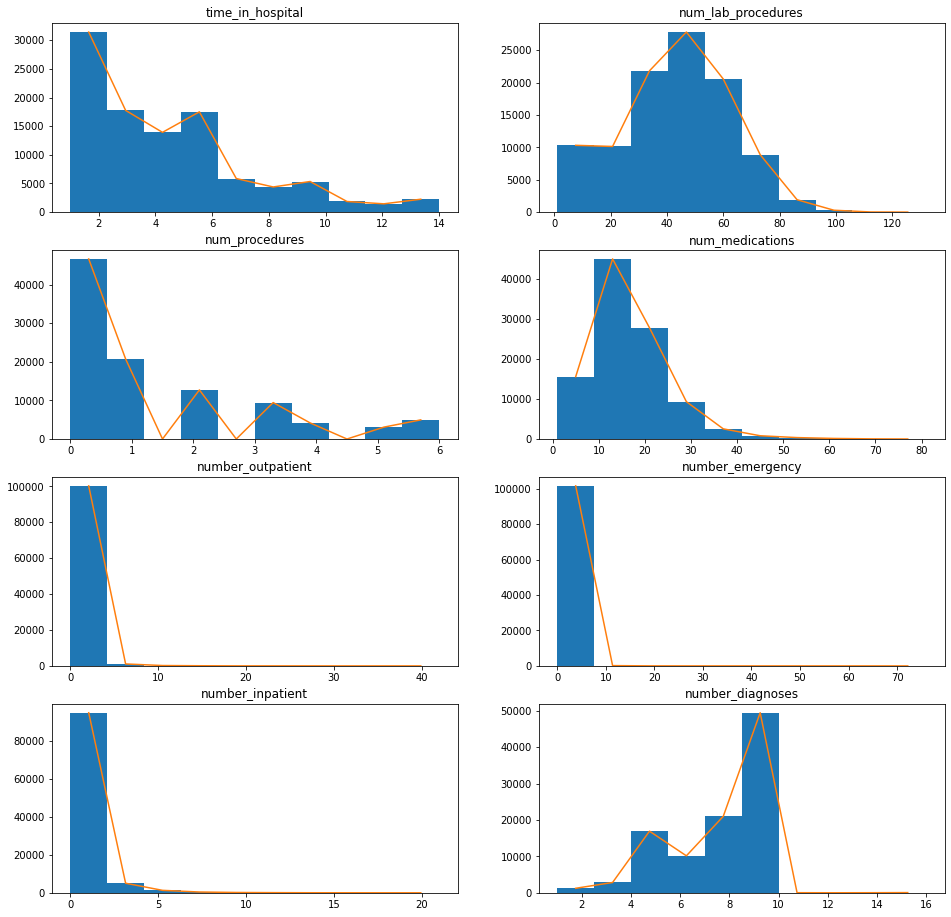

In [ ]:
plt.figure(figsize=(16,16))

for i in range(8):
    #Plot 1

    plt.subplot(4,2,i+1)
    plt.title(num_variables[i])
    n, x, _ = plt.hist(df_pandas[num_variables[i]])
    #print(x,n)
    plt.plot([(x[i]+x[i+1])/2 for i in range(len(x)-1)],n)
    #plt.show()

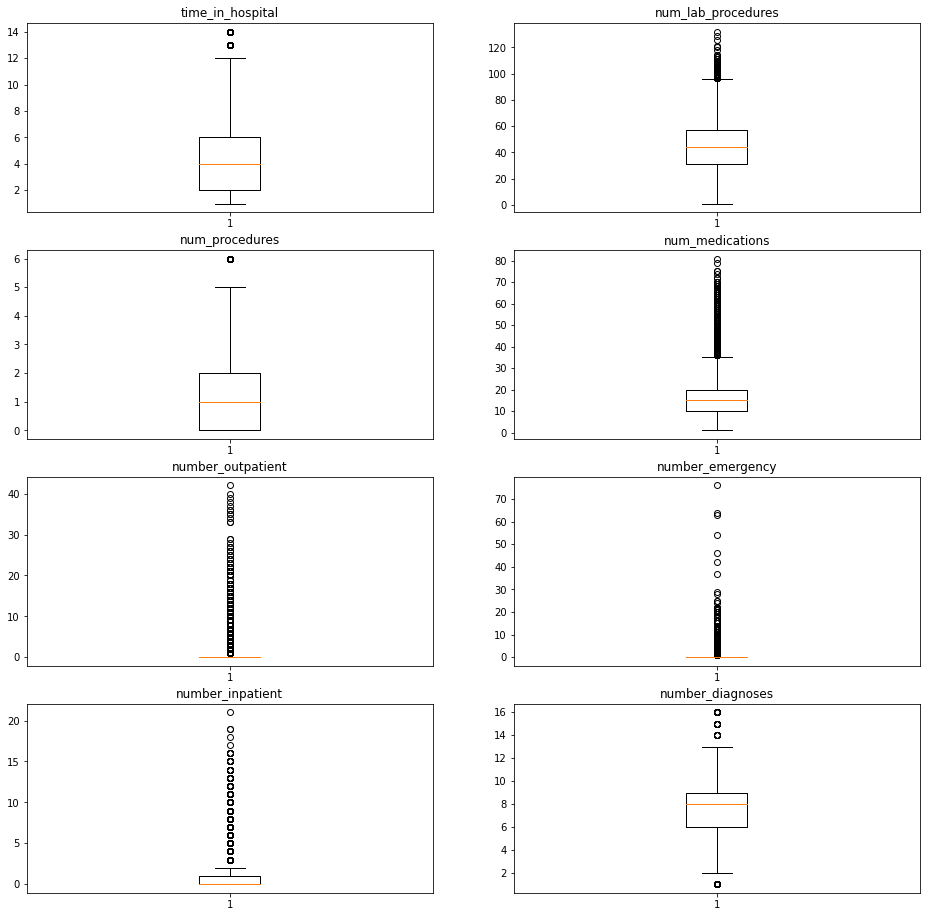

In [ ]:
plt.figure(figsize=(16,16))

for i in range(8):
    #Plot 1

    plt.subplot(4,2,i+1)
    plt.title(num_variables[i])
    plt.boxplot(df_pandas[num_variables[i]])

In [ ]:
for variable in num_variables:
    col_cnt = df_valid_cols.groupby(variable).count().orderBy("count", ascending = False)
    col_cnt_per = col_cnt.withColumn('cnt_per', f.col('count')/f.sum(col_cnt["count"]).over(Window.partitionBy())*100)
    #col_cnt_per.show()
    col_cnt_per_cumulative = col_cnt_per.withColumn('cnt_per_cumulative', f.sum(col_cnt_per["cnt_per"]).over(Window.partitionBy().orderBy().rowsBetween(-sys.maxsize, 0)))
    col_cnt_per_cumulative.show(40)

+----------------+-----+------------------+------------------+
|time_in_hospital|count|           cnt_per|cnt_per_cumulative|
+----------------+-----+------------------+------------------+
|               3|17756|17.447870605113692|17.447870605113692|
|               2|17224|16.925102686555434|34.372973291669126|
|               1|14208| 13.96144095277401| 48.33441424444314|
|               4|13924|13.682369357152686|62.016783601595826|
|               5| 9966| 9.793054654796297| 71.80983825639213|
|               6| 7539|7.4081716879900945| 79.21800994438222|
|               7| 5859|  5.75732562938506| 84.97533557376728|
|               8| 4391| 4.314800621032565| 89.29013619479984|
|               9| 3002| 2.949904683293045| 92.24004087809288|
|              10| 2342|2.3013580174124955| 94.54139889550538|
|              11| 1855|1.8228091897097263| 96.36420808521511|
|              12| 1448|1.4228720790833875|  97.7870801642985|
|              13| 1210|1.1890022207810076| 98.97608238

In [ ]:
num_variables_valid = ['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_inpatient',
 'number_diagnoses']

#Selecting valid columns and saving the dataframe

In [ ]:
df_valid = df_valid_cols[num_variables_valid + cat_variables_valid].withColumnRenamed("readmitted","readmitted_multinomial")
df_valid.show()

+----------------+------------------+--------------+---------------+----------------+----------------+---------------+------+--------+-----------------+------------------------+-------------------+------+------+------+-------------+---------+---------+-----------+-----------+---------+---------+------------+-------------+-------+------+-----------+----------------------+
|time_in_hospital|num_lab_procedures|num_procedures|num_medications|number_inpatient|number_diagnoses|           race|gender|     age|admission_type_id|discharge_disposition_id|admission_source_id|diag_1|diag_2|diag_3|max_glu_serum|A1Cresult|metformin|repaglinide|glimepiride|glipizide|glyburide|pioglitazone|rosiglitazone|insulin|change|diabetesMed|readmitted_multinomial|
+----------------+------------------+--------------+---------------+----------------+----------------+---------------+------+--------+-----------------+------------------------+-------------------+------+------+------+-------------+---------+---------+

In [ ]:
df_valid = df_valid.withColumn("readmitted",f.when(df_valid["readmitted_multinomial"] == "NO", "NO").otherwise("YES"))

In [ ]:
df_valid.show()

+----------------+------------------+--------------+---------------+----------------+----------------+---------------+------+--------+-----------------+------------------------+-------------------+------+------+------+-------------+---------+---------+-----------+-----------+---------+---------+------------+-------------+-------+------+-----------+----------------------+----------+
|time_in_hospital|num_lab_procedures|num_procedures|num_medications|number_inpatient|number_diagnoses|           race|gender|     age|admission_type_id|discharge_disposition_id|admission_source_id|diag_1|diag_2|diag_3|max_glu_serum|A1Cresult|metformin|repaglinide|glimepiride|glipizide|glyburide|pioglitazone|rosiglitazone|insulin|change|diabetesMed|readmitted_multinomial|readmitted|
+----------------+------------------+--------------+---------------+----------------+----------------+---------------+------+--------+-----------------+------------------------+-------------------+------+------+------+------------

In [ ]:
#df_valid.write.format('com.databricks.spark.csv').save("diabetic_data_valid")

#Saving the Dataframe into CSV

In [ ]:
df_valid.toPandas().to_csv('diabetic_data_valid.csv',index=False)